**importing of important libraries i.e Pandas,matplotlib,scikit Learn etc**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Laoding data set:**

In [2]:
df=pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

Checking and Removing Duplicates:

In [5]:
df.duplicated().sum()

np.int64(127)

In [8]:
df_cleaned=df.drop_duplicates()

df_cleaned.duplicated().sum()

np.int64(0)

Checking Null values

In [9]:
df_cleaned.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


Label encoding for one column Extracurricular Activities and importing its library of encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_cleaned['Extracurricular Activities']=label_encoder.fit_transform(df_cleaned['Extracurricular Activities'])
df_cleaned.head()

/tmp/ipython-input-503310916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Extracurricular Activities']=label_encoder.fit_transform(df_cleaned['Extracurricular Activities'])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


Selecting features and Label:

In [13]:
X=df_cleaned[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y=df_cleaned['Performance Index']

Splitting the Data into training And testing:

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

Selection of Model and its Training:

In [15]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

Feeding of by test data

In [16]:
y_predict=model1.predict(X_test)

Evaluation:

In [17]:
m_sqaured_error=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print('Mean sqaure error:',m_sqaured_error)
print('R2_score:',r2)

Mean sqaure error: 4.0127162222832435
R2_score: 0.9889076783363275


Visual Representation:

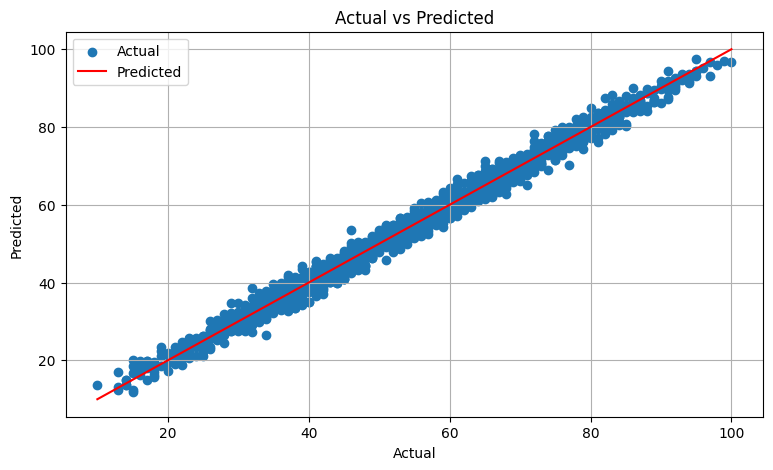

In [26]:
plt.figure(figsize=(9,5))
plt.scatter(y_test,y_predict)
plt.title('Actual vs Predicted')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend(['Actual','Predicted'])
plt.show()

